## Importaciones y _Weigth regularization_
Al añadir nuestras capas añadimos el regularizador con un peso determinado. <br>
**Dado que una manera de combatir el overfitting es poner restricciones en la complejidad de la red forzando los pesos a que tomen valores pequeños lo que hace la distribución de pesos más _regular_.** <br>Al hacer esto hacemos que la _entropía_ de nuestros datos se disperse entre estos.

#### Tipos de Weigth regularization
    
L1 regularization | L2 regularization or Weigth Decay
------------ | -------------
Hace feature selection asignando un peso de 0 a valores insignificantes y valores no insignificantes              con un peso de más de cero.| Es la suma de las raices de todos los pesos, forza a los pesos a ser pequeños pero no cero. Este método funciona bien cuando todos los pesos son importantes y son de tamaños parecidos
L1 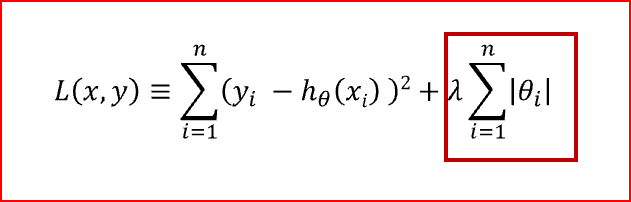 | L2 igual pero sin el absoluto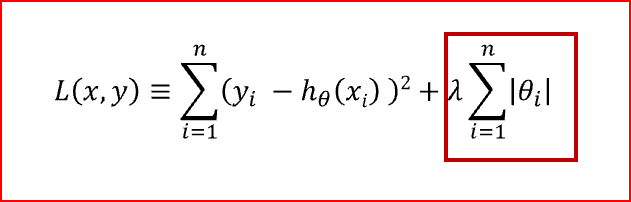



In [ ]:
%matplotlib inline
from keras.datasets import imdb # dataset with comments of people
import numpy as np
from keras import regularizers # regularizadores L1 & L2(weight decay)


# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # get the 10k most used words 
# restore np.load for future normal usage
np.load = np_load_old 


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

"""
Si uso capa densa de 4 me da una mejor validation loss que usando de 16 
Lo que INDICA UN MEJOR MODELO
"""
model = models.Sequential()
model.add(layers.Dense(16,  kernel_regularizer=regularizers.l2(0.001),  # L2 que valdrá el 0.001 del peso original
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,  kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Añadiendo _Dropout_
Dropout transdorma la matriz de salida durante entrenamiento y transforma N% de elementos en la matriz a cero arbitrariamente. El dropout rate suele estar entre 0.2 y 0.5.
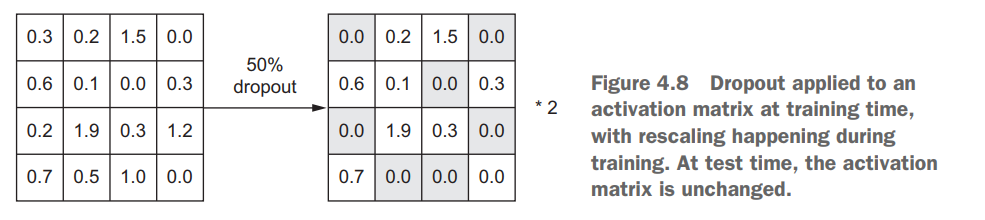

In [ ]:
%matplotlib inline
from keras.datasets import imdb # dataset with comments of people
import numpy as np
from keras import regularizers # regularizadores L1 & L2(weight decay)


# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # get the 10k most used words 
# restore np.load for future normal usage
np.load = np_load_old 


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



### Ejecución del modelo
Compilamos, entrenamos y graficamos el modelo con las variables de history_dict. <br>
Una guia básica para la arquitectura de mi modelo puede ser basada en estas premisas:
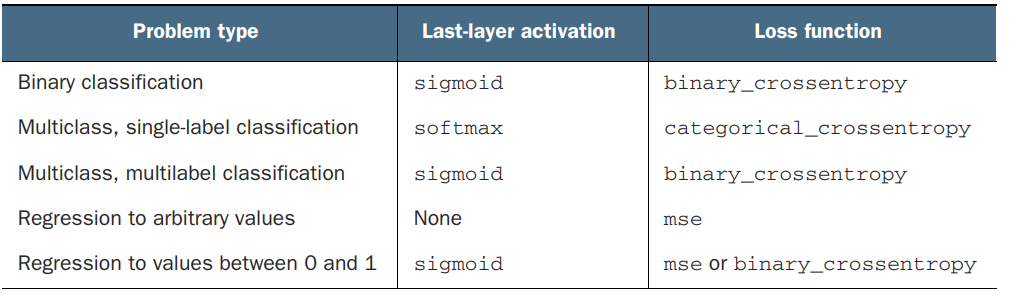

Using TensorFlow backend.
W0717 07:39:22.393296 140159551350528 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 07:39:22.525059 140159551350528 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 07:39:22.546626 140159551350528 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 07:39:22.588661 140159551350528 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 07:39:22.611524 14015955

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3164 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

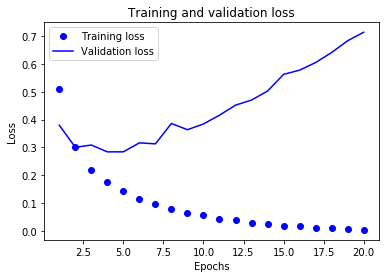

In [1]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, batch_size=512)
print score

# Graficar comportamiento:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# model.predict(x_test) # Predecir con lo entrenado

# One hot encoding manual (Vectorización)
Añadimos un array que mapea los datos en una matriz binaria.
Es parte del proceso de vectorización a tensores con datos (en este caso) de formato integer.
Basicamente es hacer un vector de la cantidad del rango de cada elemento de nuestro data set para cada uno de los valores en la secuencia de datos o el data set.

In [2]:
import numpy as np

train = np.random.randint(10, size=10) # Generamos datos
print "Data\n", train
print train[:5] # del primero al 5
print train[5:] # del 5 al ultimo

def transform_onehot(sequences, dim=10):
    results = np.zeros((len(sequences), dim)) # Generamos la matriz de las dimensiones correctas
    print "\nZeros array\n", results, "\n"
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Escribimos el valor en la posición que se encuentra
    print "Results\n"
    print results

transform_onehot(train)

Data
[0 1 5 0 7 3 6 5 5 6]
[0 1 5 0 7]
[3 6 5 5 6]

Zeros array
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

Results

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
